## Web APIs

Utilizando uma API web para ler dados de um CEP

In [59]:
import requests
cep = '13083886'
url = 'https://viacep.com.br/ws/{cep}/json/'
url = url.format(cep=cep)
r = requests.get(url)
print(r.text)

{
  "cep": "13083-886",
  "logradouro": "Avenida André Tosello",
  "complemento": "",
  "bairro": "Cidade Universitária",
  "localidade": "Campinas",
  "uf": "SP",
  "unidade": "",
  "ibge": "3509502",
  "gia": "2446"
}


## HTTP

Podemos brincar um pouco com o protocolo HTTP usando o site [httpbin](http://httpbin.org/) 

### Fazendo um GET e inspecionando os cabeçalhos de resposta básicos

In [60]:
# Fazendo um GET no site
resposta = requests.get('http://httpbin.org/')

# Verificando o código HTTP da resposta
resposta.status_code

200

In [61]:
# Imprimindo os cabeçalhos da resposta
print(resposta.headers)

{'Content-Type': 'text/html; charset=utf-8', 'Date': 'Mon, 10 Oct 2016 12:31:47 GMT', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Server': 'nginx', 'Connection': 'keep-alive', 'Content-Length': '12150'}


In [29]:
# Qual o tipo do conteúdo da resposta?
print(resposta.headers['Content-Type'])

text/html; charset=utf-8


In [107]:
# Qual o tamanho da resposta?
print(resposta.headers['Content-Length'])

12150


In [109]:
# Fazendo um GET em https://api.ipify.org/
meu_ip = requests.get('https://api.ipify.org/')

# Imprimindo o conteúdo da resposta
print(meu_ip.text)

177.8.106.72


### Negociando o tipo do conteúdo usando cabeçalhos de pedido

In [62]:
# Pedindo por uma imagem, sem especificar nada
imagem = requests.get('http://httpbin.org/image')

# Qual o tipo da imagem retornado?
print(imagem.headers['Content-Type'])

application/json


In [63]:
# application/json não é um tipo de imagem! O que aconteceu?
print(imagem.text)

{"message": "Client did not request a supported media type.", "accept": ["image/webp", "image/svg+xml", "image/jpeg", "image/png", "image/*"]}


In [64]:
# Qual foi o código de resposta?
print(imagem.status_code)

406


In [91]:
# Precisamos inserir um cabeçalho, especificando que queremos uma imagem
cabeçalho = {'accept': 'image/*'}  # Cabeçalho que pede pelo tipo PNG
imagem = requests.get('http://httpbin.org/image', headers=cabeçalho)

# Qual o tipo agora?
print(imagem.headers['Content-Type'])

image/png


In [92]:
# Qual o código da resposta?
print(imagem.status_code)

200


In [94]:
# Qual o tamanho da resposta?
print(imagem.headers['Content-Length'])

8090


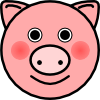

In [95]:
# Exibindo a imagem!
from IPython.display import Image
Image(imagem.content)

### Outros códigos de resposta

In [123]:
# Tentando acessar uma página proibida!
página_proibida = requests.get('http://httpbin.org/status/403')

print(página_proibida.status_code)

403


In [124]:
# E uma página que não existe?
página_inexistente = requests.get('http://httpbin.org/blablabla')
print(página_inexistente.status_code)

404


In [125]:
# Tentando acessar uma página que me redireciona para outra.
# Utilizei a flag `allow_redirects=False` para que a biblioteca `requests` não me redirecione automaticamente
# Experimente fazer o pedido alterando a flag para True!
redirecionamento = requests.get('http://httpbin.org/redirect-to?url=http://2016.pythonbrasil.org.br/',
                                allow_redirects=True)

# Qual foi o código de resposta?
print(redirecionamento.status_code)

200


In [126]:
# Quais os cabeçalhos da resposta?
print(redirecionamento.headers)

{'Expires': 'Mon, 10 Oct 2016 10:34:02 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Date': 'Mon, 10 Oct 2016 13:08:02 GMT', 'Last-Modified': 'Fri, 07 Oct 2016 00:55:36 GMT', 'Accept-Ranges': 'bytes', 'Vary': 'Accept-Encoding', 'Cache-Control': 'max-age=600', 'Age': '0', 'Via': '1.1 varnish', 'Content-Encoding': 'gzip', 'Content-Length': '14927', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'X-Served-By': 'cache-atl6231-ATL', 'X-Fastly-Request-ID': '17eb746ef63544a8f3cd6a6b4fb7584430db7df6', 'Server': 'GitHub.com', 'X-GitHub-Request-Id': '17EB272B:07C1:1DC5CC39:57FB6C40', 'X-Cache': 'HIT', 'X-Cache-Hits': '1'}


In [127]:
# Observe o cabeçalho `Location`!
print(redirecionamento.headers['Location'])

KeyError: 'location'